In [1]:
import pandas as pd
df = pd.read_csv("Sub1LF_TreadWalk_signal.csv")
print(df.head())

    accX    accY   accZ
0 -2.196 -11.765 -1.569
1 -2.510 -10.353 -2.039
2 -2.353 -10.824 -2.510
3 -1.882 -10.667 -2.667
4 -1.412 -10.353 -2.824


In [8]:
df.index

RangeIndex(start=0, stop=55931, step=1)

Converting index to a column
https://stackoverflow.com/questions/20461165/how-to-convert-pandas-index-in-a-dataframe-to-a-column

In [9]:
df.reset_index(level=0, inplace=True)

In [10]:
df.head()

,index,accX,accY,accZ
0,0,-2.196,-11.765,-1.569
1,1,-2.510,-10.353,-2.039
2,2,-2.353,-10.824,-2.510
3,3,-1.882,-10.667,-2.667
4,4,-1.412,-10.353,-2.824


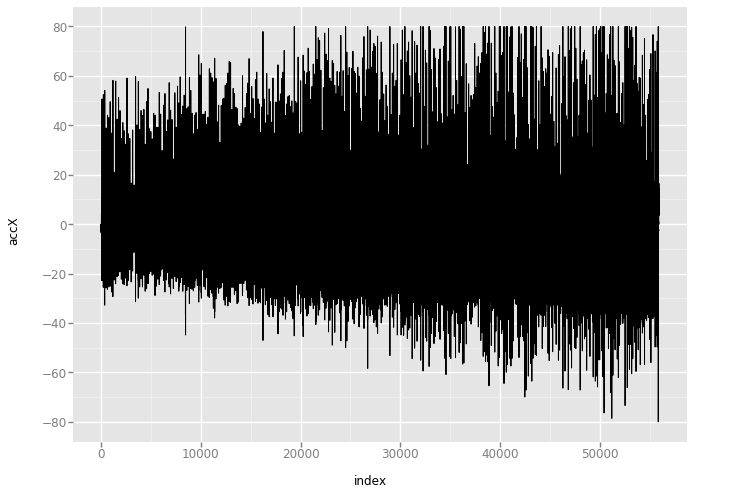

<ggplot: (-9223371901405452656)>

In [14]:
from ggplot import *

ggplot(aes(x='index', y='accX'), data=df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2)

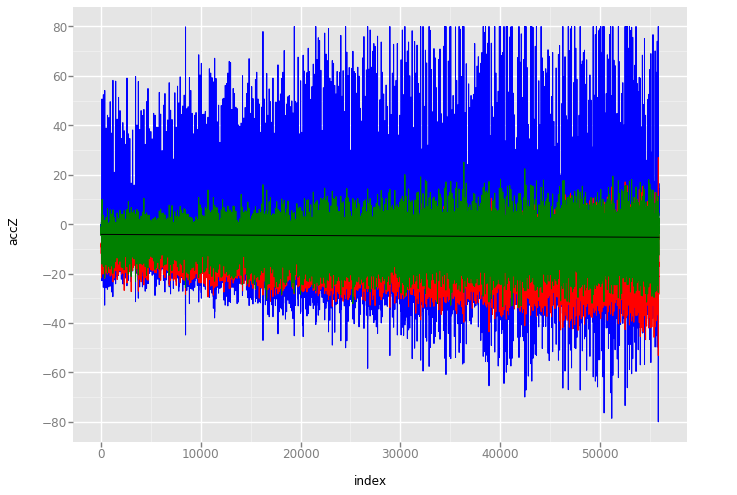

<ggplot: (-9223371901413024687)>

In [24]:
ggplot(aes(x='index'), data=df) +\
    geom_line(aes(y='accX'), color='blue') +\
    geom_line(aes(y='accY'), color='red') +\
    geom_line(aes(y='accZ'), color='green') +\
    stat_smooth(colour='white', span=0.2)

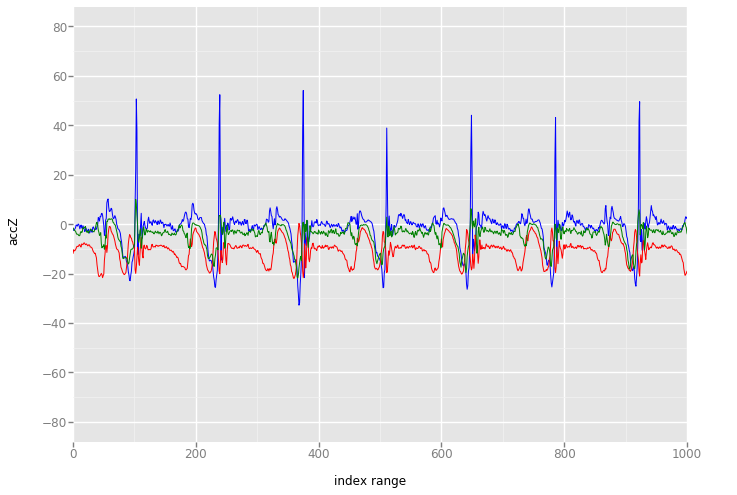

<ggplot: (-9223371901401863876)>

In [92]:
ggplot(aes(x='index'), data=df) +\
    geom_line(aes(y='accX'), color='blue') +\
    geom_line(aes(y='accY'), color='red') +\
    geom_line(aes(y='accZ'), color='green') +\
    scale_x_continuous(name="index range", limits=(0,1000))

In [48]:
import pandas as pd
df_HS = pd.read_csv("Sub1LF_TreadWalk_HS.csv", header=None)
df_TO = pd.read_csv("Sub1LF_TreadWalk_TO.csv", header=None)
print(df_HS.head())

     0
0  102
1  237
2  373
3  510
4  647


In [30]:
df_HS.shape

(456, 1)

In [39]:
rename_list = ['index']

In [49]:
df_HS.columns = rename_list
df_TO.columns = rename_list

In [41]:
df_HS.columns

Index(['index'], dtype='object')

In [42]:
list(df_HS)

['index']

In [53]:
df_HS.head()

,index
0,102
1,237
2,373
3,510
4,647


In [54]:
df_TO.head()

,index
0,46
1,182
2,320
3,454
4,591


In [108]:
import numpy as np
#df['HS'] = np.NaN
#df['TO'] = np.NaN
df['HS'] = 0
df['TO'] = 0
df['HS_mark'] = np.NaN
df['TO_mark'] = np.NaN

In [109]:
df.head()

,index,accX,accY,accZ,HS,TO,HS_mark,TO_mark
0,0,-2.196,-11.765,-1.569,0,0,NaN,NaN
1,1,-2.510,-10.353,-2.039,0,0,NaN,NaN
2,2,-2.353,-10.824,-2.510,0,0,NaN,NaN
3,3,-1.882,-10.667,-2.667,0,0,NaN,NaN
4,4,-1.412,-10.353,-2.824,0,0,NaN,NaN


In [82]:
df.loc[0]

index     0.000
accX     -2.196
accY    -11.765
accZ     -1.569
HS        0.000
TO        0.000
Name: 0, dtype: float64

In [83]:
df['index'].loc[0]

0

In [110]:
for i in df_HS.index:
    #print(df_HS['index'][i])
    indx = df_HS['index'][i]
    #print(df['index'].loc[indx])
    df['HS'].loc[indx] = 1
    df['HS_mark'].loc[indx] = 10

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [111]:
for i in df_TO.index:
    indx = df_TO['index'][i]
    df['TO'].loc[indx] = 1
    df['TO_mark'].loc[indx] = -10

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
df.loc[40:105]

,index,accX,accY,accZ,HS,TO
40,40,-0.627,-18.353,-0.471,0,0
41,41,2.667,-20.235,-2.353,0,0
42,42,2.196,-21.176,-3.294,0,0
43,43,1.255,-21.176,-4.549,0,0
44,44,3.137,-20.863,-4.235,0,0
45,45,2.980,-20.392,-3.451,0,0
46,46,4.078,-19.922,-8.000,0,1
47,47,4.392,-20.392,-9.569,0,0
48,48,3.608,-21.647,-9.098,0,0
49,49,1.725,-20.863,-8.941,0,0


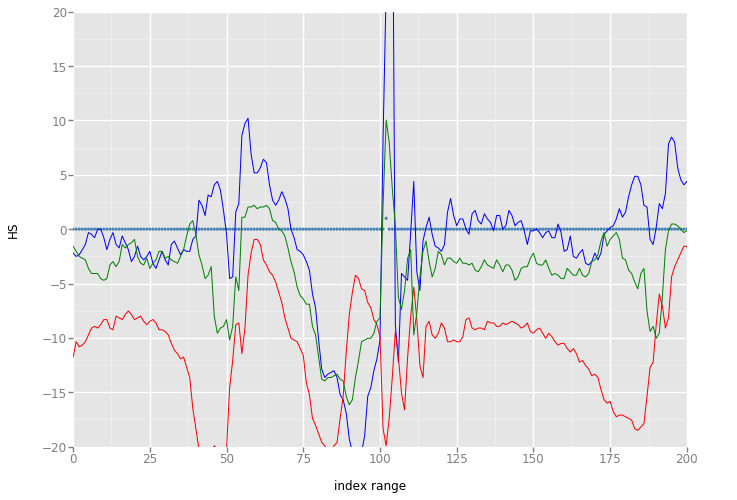

<ggplot: (135494415003)>

In [107]:
ggplot(aes(x='index'), data=df) +\
    geom_line(aes(y='accX'), color='blue') +\
    geom_line(aes(y='accY'), color='red') +\
    geom_line(aes(y='accZ'), color='green') +\
    geom_point(aes(y='HS'), color='steelblue', size=10) +\
    scale_x_continuous(name="index range", limits=(0,200)) +\
    scale_y_continuous(limits=(-20,20))
    

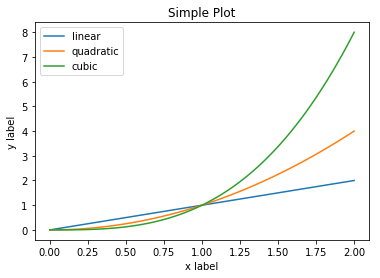

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

In [22]:
x

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494